In [1]:
#Time Series Analysis - Step by Step  Implementation ARIMA Model

#Data_Import--->Data_Cleaning--->Stationary_Check--->Model_Training--->Prediction--->prediction--->Tunning

import warnings
warnings.filterwarnings('ignore')

In [2]:
#1.Data and package Import

#Data Source - Kaggle - https://www.kaggle.com/rohanrao/nifty50-stock-market-data

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
TempData = pd.read_csv('E:\datafiles\HCLTECH.csv')
TempData.head(30)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.00,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.00,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.00,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.30,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.00,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN
5,2000-01-18,HCLTECH,EQ,1801.65,1730.55,1815.00,1657.55,1775.00,1774.50,1716.39,359900,6.177280e+13,NaN,NaN,NaN
6,2000-01-19,HCLTECH,EQ,1774.50,1815.00,1889.00,1760.00,1842.80,1851.15,1842.81,316050,5.824204e+13,NaN,NaN,NaN
7,2000-01-20,HCLTECH,EQ,1851.15,1865.00,1865.00,1750.00,1753.50,1757.85,1801.37,204700,3.687409e+13,NaN,NaN,NaN
8,2000-01-21,HCLTECH,EQ,1757.85,1761.00,1815.00,1705.00,1786.00,1781.35,1774.01,282150,5.005360e+13,NaN,NaN,NaN
9,2000-01-24,HCLTECH,EQ,1781.35,1834.90,1923.90,1795.00,1923.90,1923.90,1875.34,328650,6.163317e+13,NaN,NaN,NaN


In [3]:
#2.Data Cleaning

HCLTechStockData = TempData.dropna() #dropping all the NaN values

HCLTechStockData.index = pd.to_datetime(HCLTechStockData.Date) #we are making date column as index column
  
HCLTechStockData = HCLTechStockData["Prev Close"]['2013-01-01':'2013-12-2'] #we use 1 column for prediction
HCLTechStockData.describe()

count     230.000000
mean      852.953478
std       156.484472
min       618.700000
25%       736.350000
50%       777.450000
75%      1023.962500
max      1161.150000
Name: Prev Close, dtype: float64

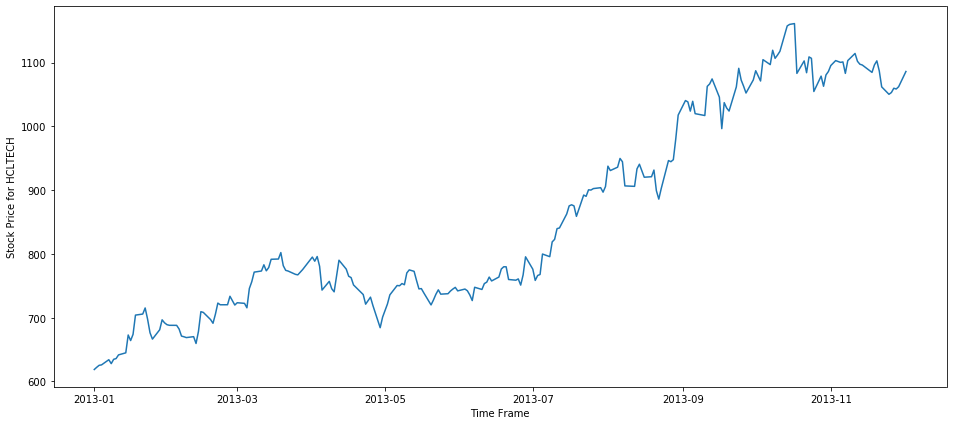

In [4]:
#2.Data Exploration

plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price for HCLTECH')
ax1.plot(HCLTechStockData)

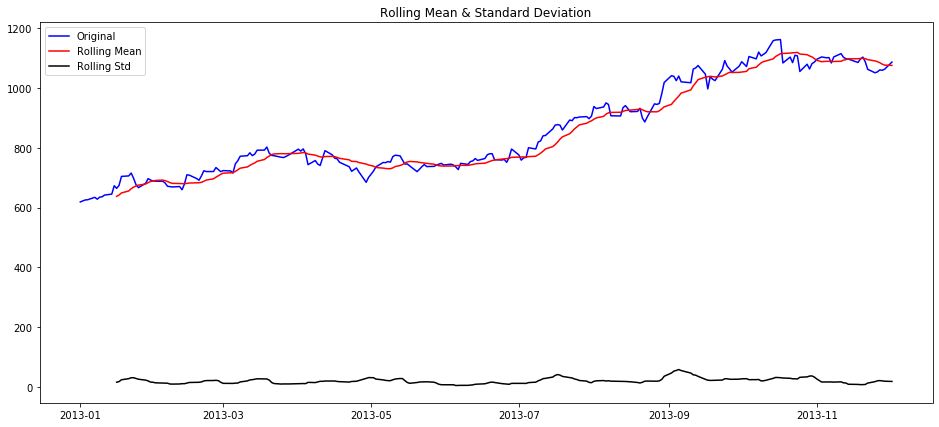

In [5]:
#3.Checking stationarity

# Method 1 -  Rolling Statistics
# Method 2 -  Duckey fuller

#Determing rolling statistics

rolLmean = HCLTechStockData.rolling(12).mean()
rolLstd = HCLTechStockData.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:

orig = plt.plot(HCLTechStockData, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#Note:- From the below plot we can see that roll_std is constatnt where roll_mean is not constant
#For a stationary time series data the mean and variance should be constant.

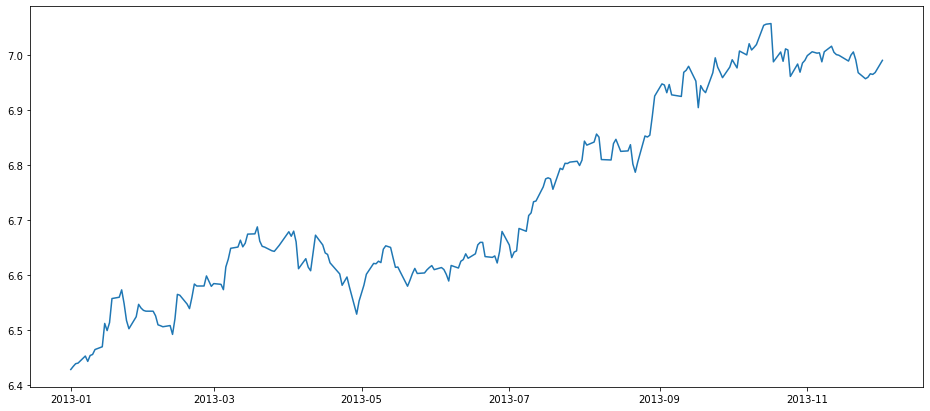

In [6]:
#3.Making time series data Stationary

#Lets try transformation to make the time series data stationary,we can use many transformations like,
#1.log_transformation,square_root_transformation,q_transformation etc...here we use log_transformation

plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(HCLTechStockData)
plt.plot(ts_log)

#Note:- Below plot shows that the time series is not stationary,to double check that we will decompose the
#time series data into seasonal components.

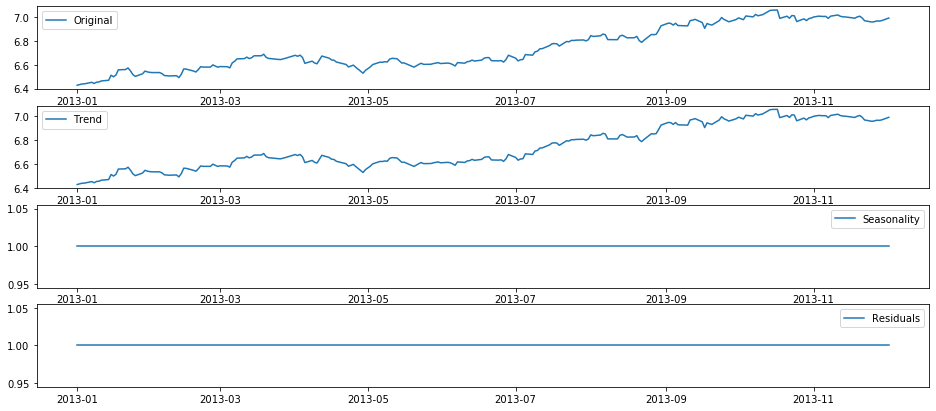

In [7]:
#3.Decomposition of time series data

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,freq=1,model = 'multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

#From below plot we are sure that the time series data is not stationary and trend component is similar
#to the original component when we apply the log_transformation.

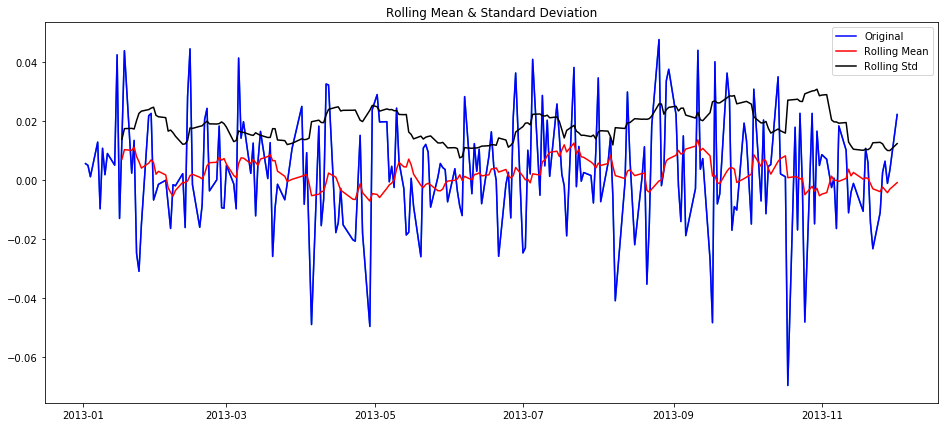

In [8]:
#Now we are creating a differenced time series

#differenced time series:- We will shift the time series by '1' and subytact from the original time series.

#Lets try differencing:-

plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

#Determing rolling statistics:-

rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()


#Plot rolling statistics:-

orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#Note:- we are trying diffrenced time series and over that we are ploting rolling statistics(Mean and Std)
#By using this diffrenced time series we can see that there is no upward trend in Mean and Std(Varaiance)
#from this we can conclude that the time series data become stationary by using diffrenced time series.

#Note:- If we want to cross validate we can also do  Duckey fuller test.

In [9]:
HCLTechStockData.sort_index(inplace= True)

In [10]:
#The ACF,PACF are important to determine the order of the AR and MA component in the ARIMA Model.


from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

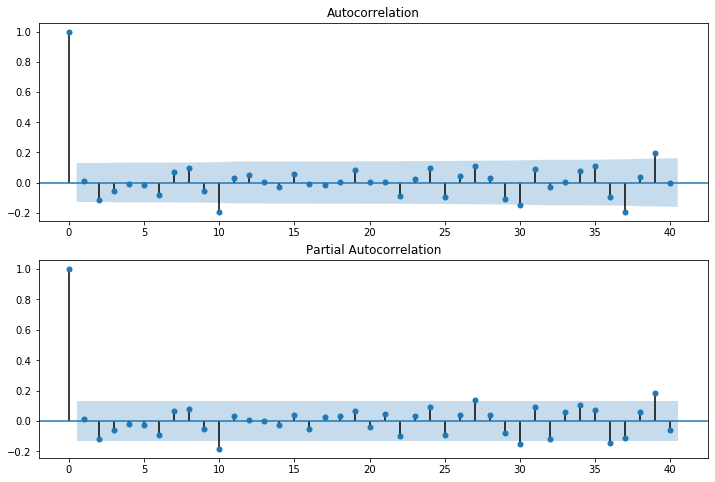

In [11]:
#Now we are plotting ACF,PACF for differenced time series model we used above

import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

In [12]:
#Whenever we are using ARIMA Model we are not sure about AR,I,MA the main advantage of ACF,PACF plotting
#help us in determing then, the highlighted blue colour points in the above ACF,PACF plotting is that,they
#are the Confidence Intervals,the first line that croses our plot is the is the line of order that is from
#the Autocorrelation the AR order is '2' i.e, AR(2) and even we can consider order of MA is '2' i.e,MA(2)
#from Partial Autocorrelation,here we are considering the d value as '1',we are not sure about the order
#of ARIMA but to start the model prediction we have considered the values of p=2:(AR),d=1:(I),q=2:(MA)

from statsmodels.tsa.arima_model import ARIMA

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


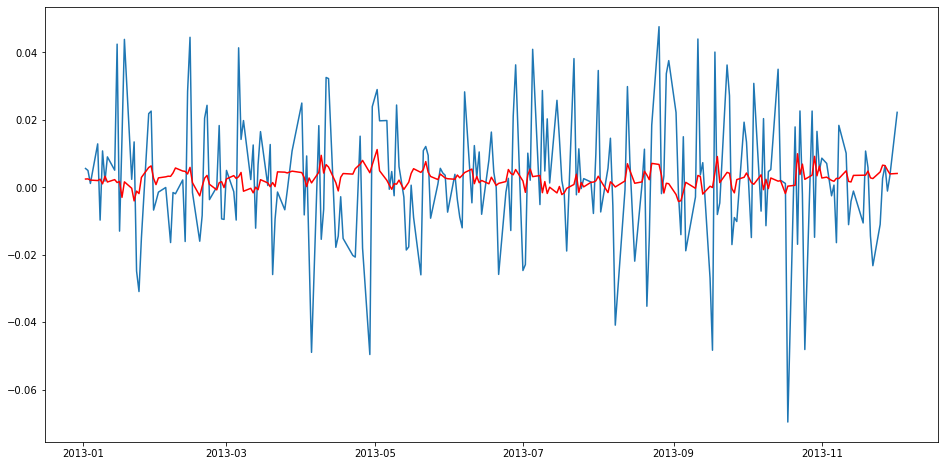

In [13]:
plt.figure(figsize=(16,8))
model = ARIMA(ts_log, order=(2,1,2))  
results_ARIMA = model.fit(disp = -1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

#Note:- The plot in bule color is actual data and the plot in red colour is the difference time series
#This shows that the data is fitted into the model and it is stationary with out trends.

In [14]:
#Taking results back to original scale

#We have done so many transformation(log,differenced_time_series transformations) on time series data,in
#order to fit them back to the original scale 

#1.We are taking the fitted values in a series
#2.We are taking the cumulative sum.

#Note:- The reason to do above two steps on time series data is that we differenced time series

In [15]:
#1.We are taking the fitted values in a series

ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

Date
2013-01-02    0.002432
2013-01-03    0.002471
2013-01-04    0.002117
2013-01-07    0.001981
2013-01-08    0.002377
dtype: float64


In [16]:
#2.We are taking the cumulative sum.
#The reason here is we differenced time series

ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

Date
2013-01-02    0.002432
2013-01-03    0.004903
2013-01-04    0.007021
2013-01-07    0.009002
2013-01-08    0.011379
dtype: float64


In [17]:
#This addition is to compensate for the differencing

ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

Date
2013-01-01    6.427621
2013-01-02    6.430053
2013-01-03    6.432524
2013-01-04    6.434641
2013-01-07    6.436622
dtype: float64

Text(0.5, 1.0, 'RMSE: 76.7106')

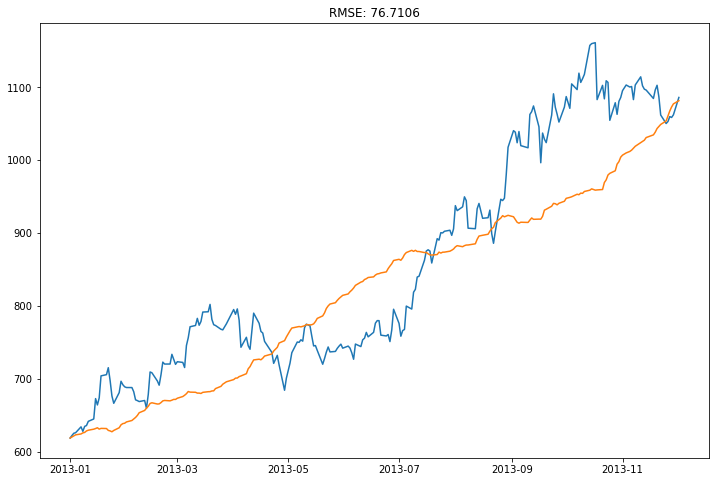

In [18]:
#In this we are doing np.exp to the ARIMA_log_Prediction because we applied log_transformation
#Note:- Reverse of log is exponential

#Here bule line in plot is actual time series data and orange line is predicted time series data.

#This time series is capturing trend components but it is unable to capture unexpected ups and downs.

#How to increase the model performance:-

#1.This can be fine tunnied or increased by tunning p,d,q values with other times series.
#2.By using Auto_ARIMA before that we can predict by using same model results_ARIMA.predict(10,20)

plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(HCLTechStockData)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-HCLTechStockData)**2)/len(HCLTechStockData)))

In [19]:
#We can provide our index values [10,20] to ARIMA model to predict

results_ARIMA.predict(10,20)

Date
2013-01-15    0.001398
2013-01-16    0.001704
2013-01-17   -0.002997
2013-01-18    0.001599
2013-01-21   -0.000306
2013-01-22   -0.004052
2013-01-23   -0.001140
2013-01-24   -0.001885
2013-01-25    0.002912
2013-01-28    0.005862
2013-01-29    0.006331
dtype: float64

In [20]:
#We can import the auto_arima and can provide different set of pdq values from this it can suggest 
#some values based on these values we can place them in our model and predict our ARIMA model for the
#given time series data.

import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=3, 
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [21]:
arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1159.001, Time=2.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1167.424, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1165.456, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1165.465, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1165.525, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1163.485, Time=0.31 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 2.892 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)